In [2]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from xhistogram.xarray import histogram
%matplotlib inline
# Don't display filter warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the data
# (from restart)
config = 'OM4p25_JRA55do1.4_0netfw_cycle6'
rootdir = '/archive/Raphael.Dussin/xanadu_esm4_20190304_mom6_2019.08.08/'+config+'/gfdl.ncrc4-intel16-prod/pp/'
pp = 'ocean_monthly'
localdir = '/ts/monthly/1yr/'
filename = pp+'.*.nc'
ds = xr.open_mfdataset(rootdir+pp+localdir+filename).isel(time=slice(0,12)).mean('time',keep_attrs=True)
grid = xr.open_dataset(rootdir+pp+'/'+pp+'.static.nc')
# Specify some constants
Cp = 3992.
rho0 = 1035.

In [4]:
# Also load some of the 3d tendency variables
pp = 'ocean_annual_z'
localdir = '/ts/annual/5yr/'
filename = pp+'.1958-*.*.nc'
ds_annual = xr.open_mfdataset(rootdir+pp+localdir+filename).isel(time=0)

In [5]:
ds_annual

<xarray.Dataset>
Dimensions:                         (nv: 2, xh: 1440, xq: 1440, yh: 1080, yq: 1080, z_i: 36, z_l: 35)
Coordinates:
  * nv                              (nv) float64 1.0 2.0
    time                            object 1958-07-02 12:00:00
  * xh                              (xh) float64 -299.7 -299.5 ... 59.78 60.03
  * yh                              (yh) float64 -80.39 -80.31 ... 89.84 89.95
  * z_i                             (z_i) float64 0.0 5.0 ... 6.25e+03 6.75e+03
  * z_l                             (z_l) float64 2.5 10.0 ... 6e+03 6.5e+03
  * xq                              (xq) float64 -299.6 -299.3 ... 59.91 60.16
  * yq                              (yq) float64 -80.35 -80.27 ... 89.89 90.0
Data variables:
    Kd_BBL                          (z_i, yh, xh) float32 dask.array<chunksize=(36, 1080, 1440), meta=np.ndarray>
    average_DT                      timedelta64[ns] dask.array<chunksize=(), meta=np.ndarray>
    average_T1                      datetime64[ns] dask.array<chunksize=(), meta=np.ndarray>
    average_T2                      datetime64[ns] dask.array<chunksize=(), meta=np.ndarray>
    time_bnds                       (nv) timedelta64[ns] dask.array<chunksize=(2,), meta=np.ndarray>
    Kd_ePBL                         (z_i, yh, xh) float32 dask.array<chunksize=(36, 1080, 1440), meta=np.ndarray>
    Kd_interface                    (z_i, yh, xh) float32 dask.array<chunksize=(36, 1080, 1440), meta=np.ndarray>
    Kd_itides                       (z_i, yh, xh) float32 dask.array<chunksize=(36, 1080, 1440), meta=np.ndarray>
    Kd_shear                        (z_i, yh, xh) float32 dask.array<chunksize=(36, 1080, 1440), meta=np.ndarray>
    S_advection_xy                  (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    S_adx                           (z_l, yh, xq) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    S_ady                           (z_l, yq, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    Sh_tendency_vert_remap          (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    T_advection_xy                  (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    T_adx                           (z_l, yh, xq) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    T_ady                           (z_l, yq, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    Th_tendency_vert_remap          (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    agessc                          (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    boundary_forcing_heat_tendency  (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    boundary_forcing_salt_tendency  (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    difmxybo                        (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    difvho                          (z_i, yh, xh) float32 dask.array<chunksize=(36, 1080, 1440), meta=np.ndarray>
    difvso                          (z_i, yh, xh) float32 dask.array<chunksize=(36, 1080, 1440), meta=np.ndarray>
    frazil_heat_tendency            (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    obvfsq                          (z_i, yh, xh) float32 dask.array<chunksize=(36, 1080, 1440), meta=np.ndarray>
    opottempdiff                    (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    opottemptend                    (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    osaltdiff                       (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    osaltpmdiff                     (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    osalttend                

## Salt and freshwater

In [6]:
salty = ['prlq', 'prsn','evs','friver','ficeberg','fsitherm','sfdsi','wfo','net_massin','net_massout',
        'vprec','salt_flux_added']

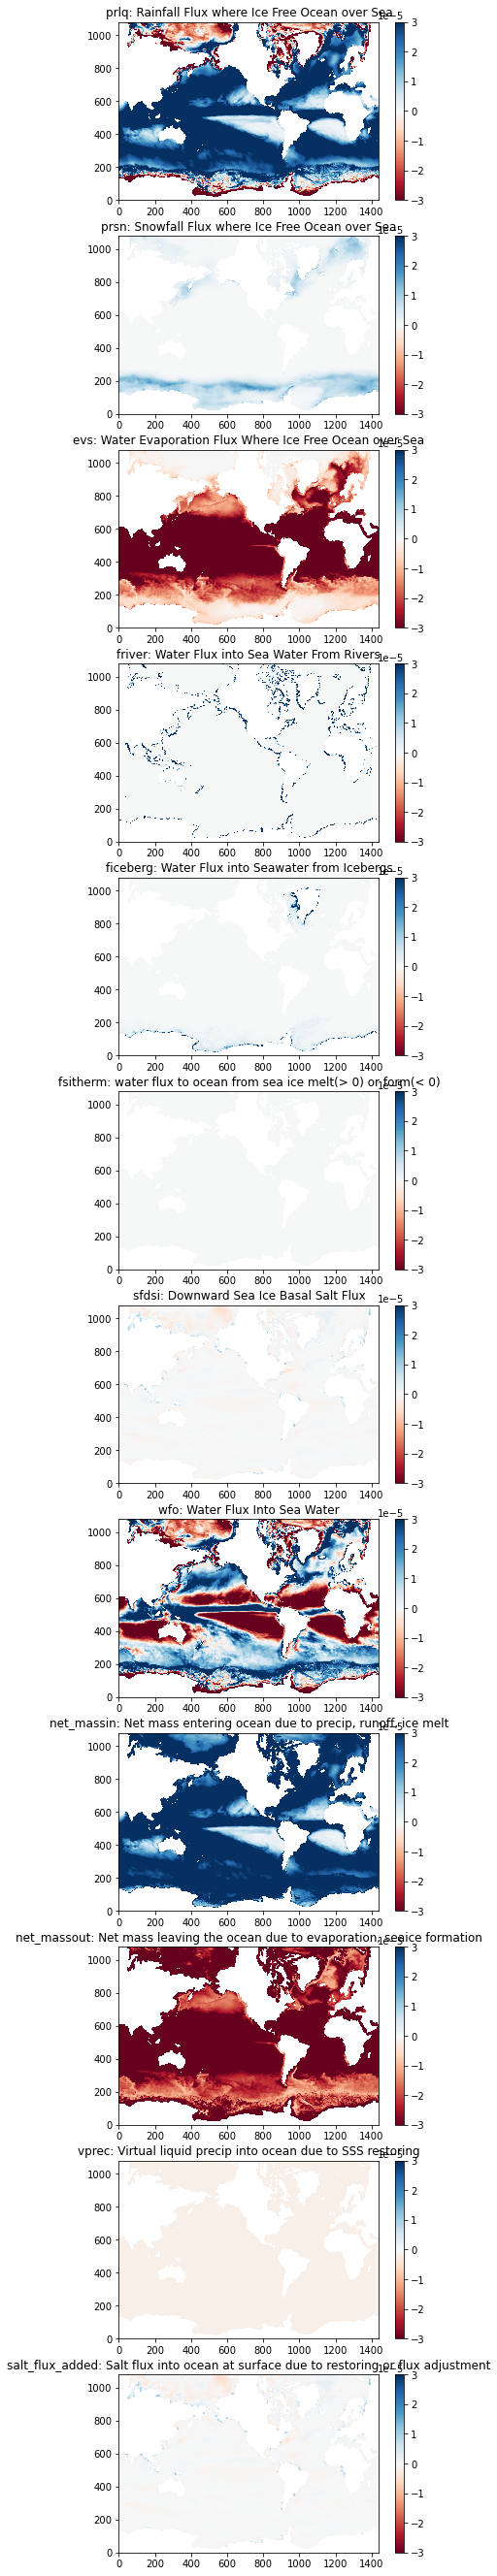

In [97]:
n = len(salty)
fig,ax=plt.subplots(figsize=(6,n*4),nrows=n)
for i, var in enumerate(salty):
    if var=='rsdo':
        C = ds[var].sum('zi')
    else:
        C = ds[var]
        
    im=ax[i].pcolormesh(C,cmap='RdBu',vmin=-3E-5,vmax=3E-5)
    plt.colorbar(im,ax=ax[i])
    ax[i].set_title(var+': '+ds[var].attrs['long_name'])

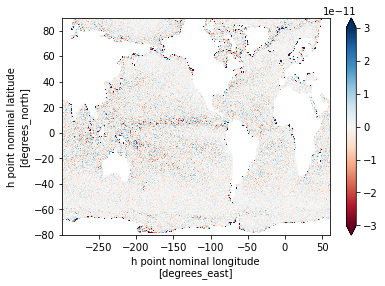

In [87]:
(ds['net_massin']+ds['net_massout']-ds['wfo']).plot(vmin=-3E-11,vmax=3E-11,cmap='RdBu')

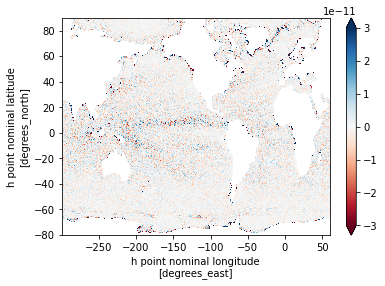

In [88]:
(ds['prlq']+ds['prsn']
   +ds['friver']+ds['ficeberg']+ds['fsitherm']
   +ds['evs']
   +ds['vprec']
    -ds['wfo']).plot(vmin=-3E-11,vmax=3E-11,cmap='RdBu')

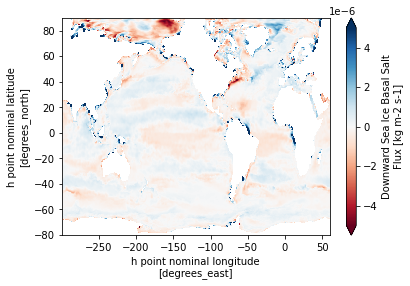

In [89]:
ds['sfdsi'].plot(vmin=-5E-6,vmax=5E-6,cmap='RdBu')

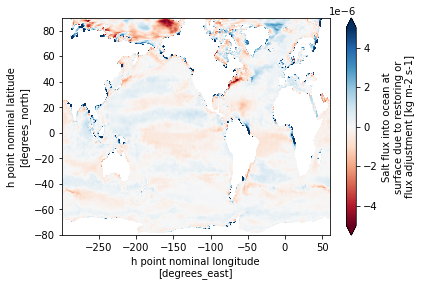

In [90]:
(ds['salt_flux_added']).plot(vmin=-5E-6,vmax=5E-6,cmap='RdBu')

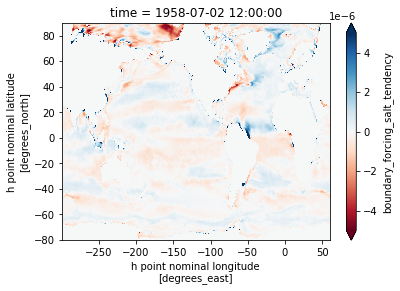

In [91]:
ds_annual['boundary_forcing_salt_tendency'].sum('z_l').plot(vmin=-5E-6,vmax=5E-6,cmap='RdBu')

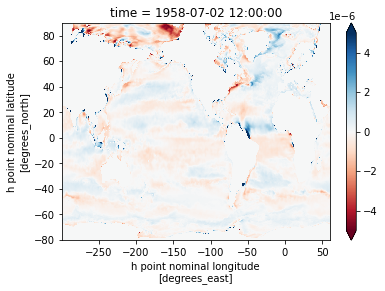

In [92]:
(ds_annual['osalttend']-ds_annual['S_advection_xy']).sum('z_l').plot(vmin=-5E-6,vmax=5E-6,cmap='RdBu')

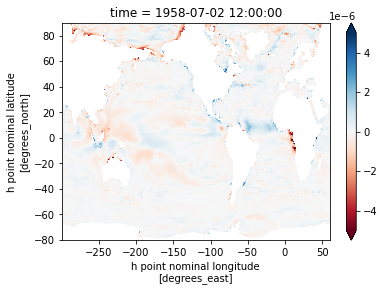

In [93]:
(ds_annual['boundary_forcing_salt_tendency'].sum('z_l')-ds['sfdsi']).plot(vmin=-5E-6,vmax=5E-6,cmap='RdBu')

In [94]:
ds_annual

<xarray.Dataset>
Dimensions:                         (nv: 2, xh: 1440, xq: 1440, yh: 1080, yq: 1080, z_i: 36, z_l: 35)
Coordinates:
  * nv                              (nv) float64 1.0 2.0
    time                            object 1958-07-02 12:00:00
  * xh                              (xh) float64 -299.7 -299.5 ... 59.78 60.03
  * yh                              (yh) float64 -80.39 -80.31 ... 89.84 89.95
  * z_i                             (z_i) float64 0.0 5.0 ... 6.25e+03 6.75e+03
  * z_l                             (z_l) float64 2.5 10.0 ... 6e+03 6.5e+03
  * xq                              (xq) float64 -299.6 -299.3 ... 59.91 60.16
  * yq                              (yq) float64 -80.35 -80.27 ... 89.89 90.0
Data variables:
    Kd_BBL                          (z_i, yh, xh) float32 dask.array<chunksize=(36, 1080, 1440), meta=np.ndarray>
    average_DT                      timedelta64[ns] dask.array<chunksize=(), meta=np.ndarray>
    average_T1                      datetime64[ns] dask.array<chunksize=(), meta=np.ndarray>
    average_T2                      datetime64[ns] dask.array<chunksize=(), meta=np.ndarray>
    time_bnds                       (nv) timedelta64[ns] dask.array<chunksize=(2,), meta=np.ndarray>
    Kd_ePBL                         (z_i, yh, xh) float32 dask.array<chunksize=(36, 1080, 1440), meta=np.ndarray>
    Kd_interface                    (z_i, yh, xh) float32 dask.array<chunksize=(36, 1080, 1440), meta=np.ndarray>
    Kd_itides                       (z_i, yh, xh) float32 dask.array<chunksize=(36, 1080, 1440), meta=np.ndarray>
    Kd_shear                        (z_i, yh, xh) float32 dask.array<chunksize=(36, 1080, 1440), meta=np.ndarray>
    S_advection_xy                  (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    S_adx                           (z_l, yh, xq) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    S_ady                           (z_l, yq, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    Sh_tendency_vert_remap          (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    T_advection_xy                  (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    T_adx                           (z_l, yh, xq) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    T_ady                           (z_l, yq, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    Th_tendency_vert_remap          (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    agessc                          (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    boundary_forcing_heat_tendency  (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    boundary_forcing_salt_tendency  (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    difmxybo                        (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    difvho                          (z_i, yh, xh) float32 dask.array<chunksize=(36, 1080, 1440), meta=np.ndarray>
    difvso                          (z_i, yh, xh) float32 dask.array<chunksize=(36, 1080, 1440), meta=np.ndarray>
    frazil_heat_tendency            (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    obvfsq                          (z_i, yh, xh) float32 dask.array<chunksize=(36, 1080, 1440), meta=np.ndarray>
    opottempdiff                    (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    opottemptend                    (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    osaltdiff                       (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    osaltpmdiff                     (z_l, yh, xh) float32 dask.array<chunksize=(35, 1080, 1440), meta=np.ndarray>
    osalttend                

## What I'm finding out about salt
- wfo = net_massin - net_massout; to machine precision
- ice melt/formation is _included_ in `prlq` (see diag_table from this OM4 run)
    - see here https://github.com/NOAA-GFDL/MOM6-examples/blob/a2162e49fffaeed79201a6e26f25c108f1f7ebb8/ice_ocean_SIS2/OM4_025/diag_table.MOM6_spinup#L345
- the term `salt_flux_added` appears to be the negative of the other two
- interesting correspondence between `sfdsi` and `salt_flux_added`; it looks like `sfdsi` might have restoring salt flux added to it 

- omitting both of these terms leaves a very close balance between `wfo` and all the other terms (v close to closed at machine precision)
- But, including both of these two terms leaves a bizarre pattern with a large

***
OK, have a look here https://github.com/NOAA-GFDL/MOM6/blob/136afce0b872a996289da2b50b6af8dc59d64365/src/core/MOM_forcing_type.F90#L1825
Seems like the CMOR naming could be a little confusing, perhaps better diagnostics could be used.

`sfdsi` is in fact `'Net salt flux into ocean at surface (restoring + sea-ice)'`

***

Going back to my original issue - perhaps this issue here is that I am attempting to connect the _salt_ tendency with a salinity tendency... is there a fundamental flaw here, particularly in relation to the boundary forcing, since addition of freshwater cannot change salt, so all I'm getting is the restoring term.

Do I need the thickness tendency at the same time, to reconstruct the salinity tendency?

## Heat

In [7]:
hot = ['Heat_PmE','LwLatSens',
       'heat_content_cond','heat_content_massin','heat_content_massout',
       'heat_content_surfwater',
       'hfds','hfevapds','hfibthermds',
       'hflso','hfrainds','hfrunoffds',
       'hfsifrazil','hfsnthermds','hfsso',
       'net_heat_coupler',
       'rlntds','rsdo','rsntds',]

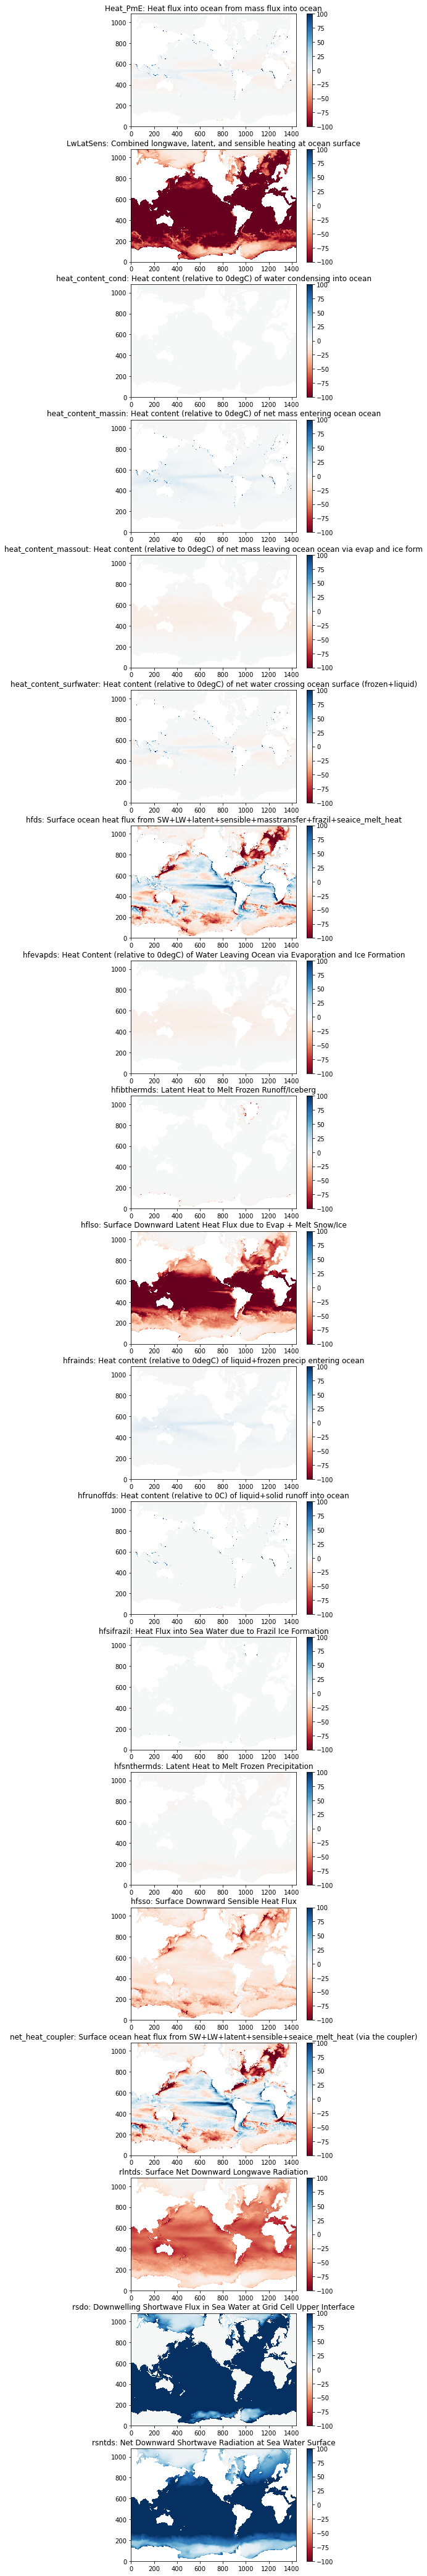

In [8]:
n = len(hot)
fig,ax=plt.subplots(figsize=(6,n*4),nrows=n)
for i, var in enumerate(hot):
    if var=='rsdo':
        C = ds[var].sum('zi')
    else:
        C = ds[var]
        
    im=ax[i].pcolormesh(C,cmap='RdBu',vmin=-100,vmax=100)
    plt.colorbar(im,ax=ax[i])
    ax[i].set_title(var+': '+ds[var].attrs['long_name'])

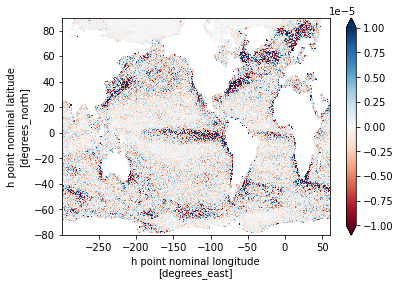

In [9]:
(ds['hfds']-ds['net_heat_coupler']-ds['heat_content_surfwater']-ds['hfsifrazil']).plot(vmin=-1E-5,vmax=1E-5,cmap='RdBu')

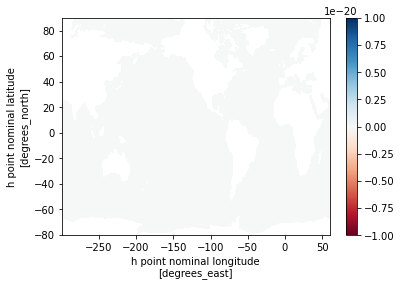

In [10]:
(ds['Heat_PmE']-ds['heat_content_surfwater']).plot(vmin=-1E-20,vmax=1E-20,cmap='RdBu')

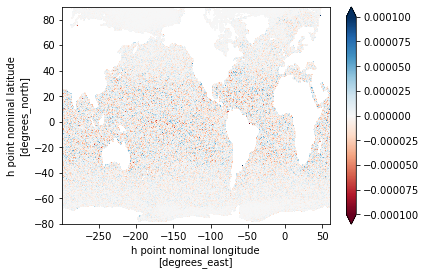

In [11]:
(ds['hfds']-
 #ds['hfevapds']-
 #ds['hfibthermds']-
 ds['hflso']-
 #ds['hfrainds']-
 #ds['hfrunoffds']-
 ds['hfsifrazil']-
 #ds['hfsnthermds']-
 ds['hfsso']-
 ds['rlntds']-
 ds['rsntds']-
 ds['heat_content_surfwater']
).plot(vmin=-1E-4,vmax=1E-4,cmap='RdBu')

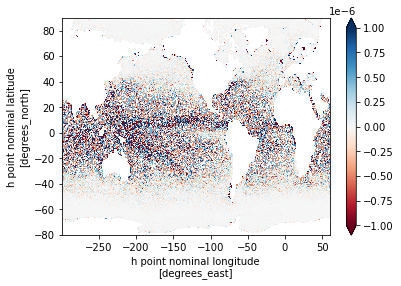

In [12]:
(ds['heat_content_surfwater']-
 ds['heat_content_massin']-
 ds['heat_content_massout']
# ds['heat_content_cond']
#   ds['hfevapds']-
#  ds['hfibthermds']-
#   ds['hfrainds']-
#   ds['hfrunoffds']
#  ds['hfsnthermds']
).plot(vmin=-1E-6,vmax=1E-6,cmap='RdBu')

### What I'm learning about heat
- `'net_heat_coupler'` provides the same but is missing contributions from frazil ice and mass fluxes
- `'Heat_PmE'` is exactly the same as `'heat_content_surfwater'`
- the total heat flux `'hfds'` includes the surface radiative forcing, and sensible and latent heat fluxes, and the heat due to the net mass in, and the heat due to frazil ice
- the `'heat_content_surfwater'` is balanced by `massin + massout`

Some uncertainty about relating the shortwave flux at the cell interface `'rsdo'` to the 3D tendencies. I think that what is given as the shortwave flux at the ocean surface `'rsntds'` should be the correct value to balance the 3D fluxes, since this value is just distributed through the water column. Perhaps the tendency due to this flux depends on the layer thickness, hence the mismatch between surface fluxes and the sum of the 3D tendency.


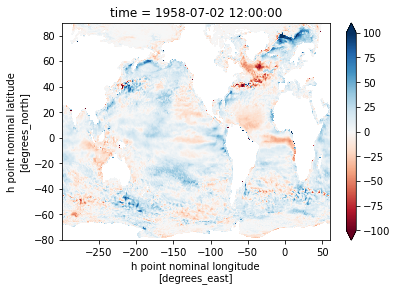

In [13]:
(ds['hfds']-ds_annual['boundary_forcing_heat_tendency'].sum('z_l')-ds_annual['frazil_heat_tendency'].sum('z_l')).plot(vmin=-100,vmax=100,cmap='RdBu')

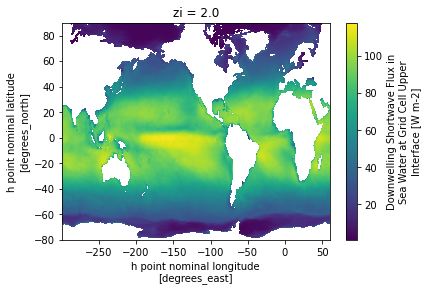

In [170]:
(ds['rsdo'].isel(zi=1)).plot()

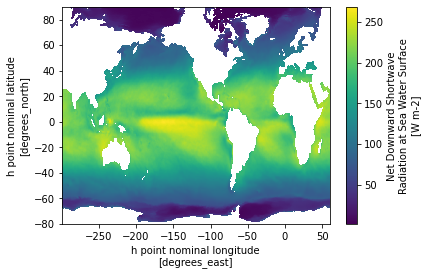

In [168]:
ds['rsntds'].plot()